Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  

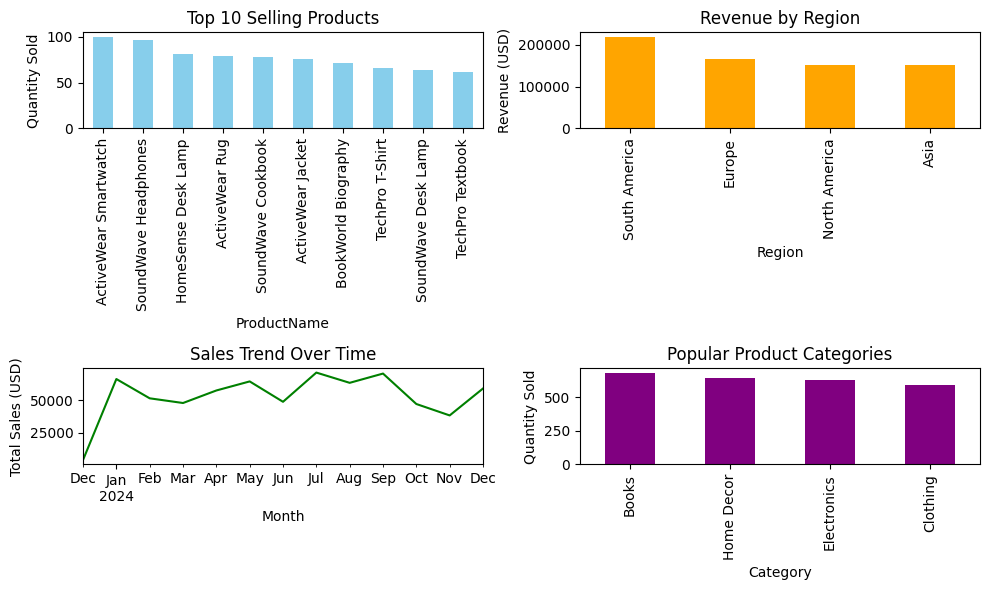

In [13]:
# //TASK 1


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
transactions = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Basic overview
print("Customers Dataset:")
print(customers.info(), customers.describe())

print("Products Dataset:")
print(products.info(), products.describe())

print("Transactions Dataset:")
print(transactions.info(), transactions.describe())

# 1. Top-selling products
top_products = transactions.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top-selling products:")
print(top_products)

# 2. Revenue by Region
revenue_by_region = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(revenue_by_region)

# 3. Trend of sales over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
sales_trend = transactions.groupby(transactions['TransactionDate'].dt.to_period("M"))['TotalValue'].sum()
print("Sales trend over time:")
print(sales_trend)

# 4. Most popular product categories
popular_categories = transactions.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Most popular categories:")
print(popular_categories)

# 5. Customer lifetime value
customer_ltv = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 customers by lifetime value:")
print(customer_ltv)

# Plots
plt.figure(figsize=(10, 6))

# Top-selling products
plt.subplot(2, 2, 1)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Selling Products')
plt.ylabel('Quantity Sold')

# Revenue by Region
plt.subplot(2, 2, 2)
revenue_by_region.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.ylabel('Revenue (USD)')

# Sales trend
plt.subplot(2, 2, 3)
sales_trend.plot(color='green')
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Month')

# Most popular categories
plt.subplot(2, 2, 4)
popular_categories.plot(kind='bar', color='purple')
plt.title('Popular Product Categories')
plt.ylabel('Quantity Sold')

plt.tight_layout()
plt.savefig("EDA_Plots.pdf")
plt.show()